In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("linkedin_data_jobs.csv")

In [5]:
df.head()

,id,title,company,location,link,source,date_posted,work_type,employment_type,description
0,1,Data Analyst,Meta,"New York, NY",https://www.linkedin.com/jobs/view/data-analys...,LinkedIn,2025-04-14,NaN,NaN,The Social Measurement team is a growing team ...
1,2,Data Analyst,Meta,"San Francisco, CA",https://www.linkedin.com/jobs/view/data-analys...,LinkedIn,2025-04-14,NaN,NaN,The Social Measurement team is a growing team ...
2,3,Data Analyst,Meta,"Los Angeles, CA",https://www.linkedin.com/jobs/view/data-analys...,LinkedIn,2025-04-14,NaN,NaN,The Social Measurement team is a growing team ...
3,4,Data Analyst,Meta,"Washington, DC",https://www.linkedin.com/jobs/view/data-analys...,LinkedIn,2025-04-14,NaN,NaN,The Social Measurement team is a growing team ...
4,5,Data Analyst II,Pinterest,"Chicago, IL",https://www.linkedin.com/jobs/view/data-analys...,LinkedIn,2025-04-16,NaN,NaN,About Pinterest\n\nMillions of people around t...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327 entries, 0 to 326
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               327 non-null    int64  
 1   title            327 non-null    object 
 2   company          327 non-null    object 
 3   location         327 non-null    object 
 4   link             327 non-null    object 
 5   source           327 non-null    object 
 6   date_posted      327 non-null    object 
 7   work_type        0 non-null      float64
 8   employment_type  0 non-null      float64
 9   description      327 non-null    object 
dtypes: float64(2), int64(1), object(7)
memory usage: 25.7+ KB


In [9]:
df.describe()

,id,work_type,employment_type
count,327.000000,0.0,0.0
mean,382.605505,NaN,NaN
std,224.546087,NaN,NaN
min,1.000000,NaN,NaN
25%,132.500000,NaN,NaN
50%,425.000000,NaN,NaN
75%,599.500000,NaN,NaN
max,741.000000,NaN,NaN


In [11]:
df.dropna(axis=1, how="all", inplace=True)

In [17]:
df.head()

,id,title,company,location,link,source,date_posted,description
0,1,Data Analyst,Meta,"New York, NY",https://www.linkedin.com/jobs/view/data-analys...,LinkedIn,2025-04-14,The Social Measurement team is a growing team ...
1,2,Data Analyst,Meta,"San Francisco, CA",https://www.linkedin.com/jobs/view/data-analys...,LinkedIn,2025-04-14,The Social Measurement team is a growing team ...
2,3,Data Analyst,Meta,"Los Angeles, CA",https://www.linkedin.com/jobs/view/data-analys...,LinkedIn,2025-04-14,The Social Measurement team is a growing team ...
3,4,Data Analyst,Meta,"Washington, DC",https://www.linkedin.com/jobs/view/data-analys...,LinkedIn,2025-04-14,The Social Measurement team is a growing team ...
4,5,Data Analyst II,Pinterest,"Chicago, IL",https://www.linkedin.com/jobs/view/data-analys...,LinkedIn,2025-04-16,About Pinterest\n\nMillions of people around t...


In [29]:
print(df["company"].value_counts())

company
Meta                                  57
Google                                12
Netflix                               11
Amazon                                10
Pinterest                              5
                                      ..
Toyota Financial Services (UK) PLC     1
Searchability®                         1
Haybury                                1
Etiqa Insurance Singapore              1
IntePros                               1
Name: count, Length: 193, dtype: int64


In [31]:
print(df["location"].value_counts())

location
New York, NY                         31
United States                        26
Bengaluru, Karnataka, India          25
San Francisco, CA                    19
Sunnyvale, CA                        10
                                     ..
Greater Minneapolis-St. Paul Area     1
Gurgaon, Haryana, India               1
Nevada, United States                 1
Singapore, Singapore                  1
Mumbai, Maharashtra, India            1
Name: count, Length: 120, dtype: int64


In [33]:
print(df["title"].value_counts())

title
Data Analyst                                       53
Data Engineer                                      29
Data Scientist, Product Analytics                  26
Data Scientist                                     23
Data Engineer, Product Analytics                   19
                                                   ..
Data analyst                                        1
Analista de Análise de Dados Junior                 1
Data Analyst - Local to Pittsburgh or Cleveland     1
Data Associate - Gurgaon                            1
Data Engineer I                                     1
Name: count, Length: 149, dtype: int64


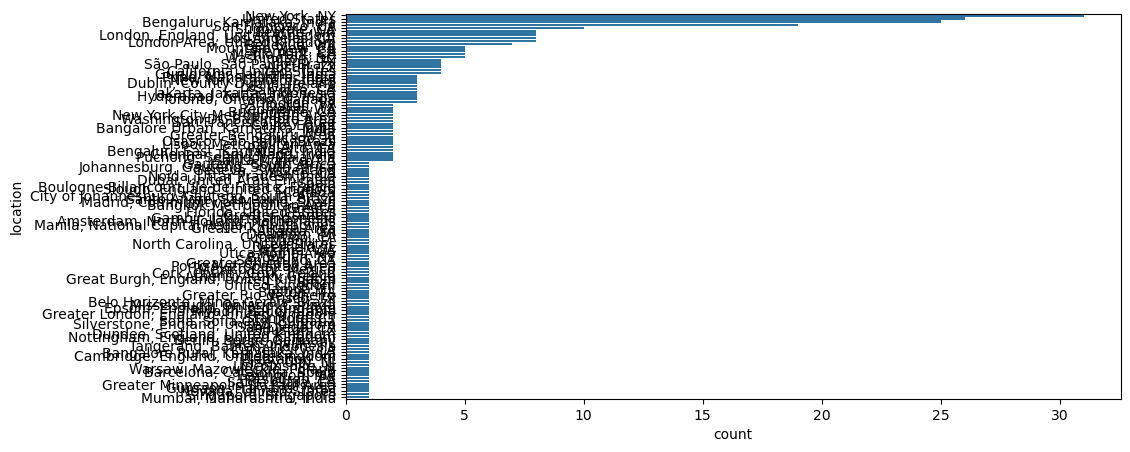

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.countplot(y=df["location"], order=df["location"].value_counts().index)
plt.show()

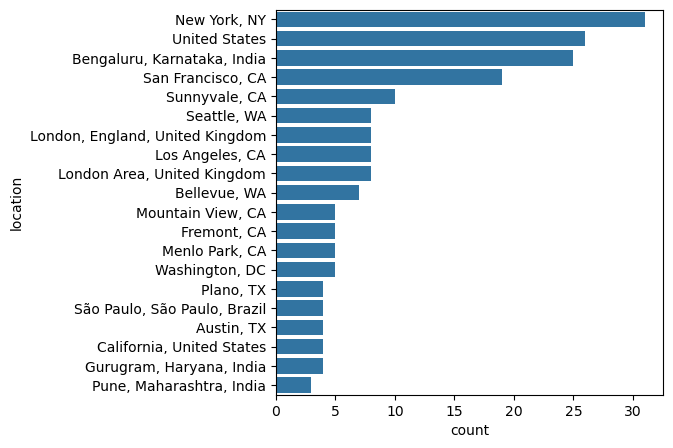

In [86]:
plt.figure(figsize=(5,5))
sns.countplot(y=df["location"], order=df["location"].value_counts().index[:20])
plt.show()

In [88]:
# At this point, I am creating a problem statement, questions, and visualizations

# Problem Statement: Is Data Analysis still a worthwhile profession to pursue in the U.S.?

# 1) What locations offer the most data jobs?
# 2) What companies are hiring for data?
# 3) What soft skills are commonly listed?

In [90]:
location_counts = df["location"].value_counts().head(10)

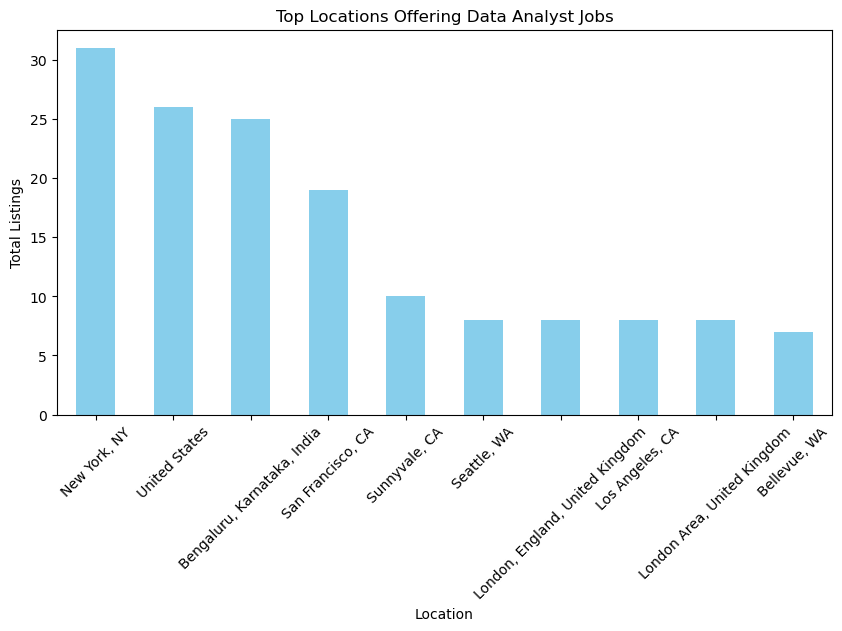

In [134]:
plt.figure(figsize=(10,5))
location_counts.plot(kind="bar", color="skyblue")
plt.title("Top Locations Offering Data Analyst Jobs")
plt.xlabel("Location")
plt.ylabel("Total Listings")
plt.xticks(rotation=45)
plt.show()

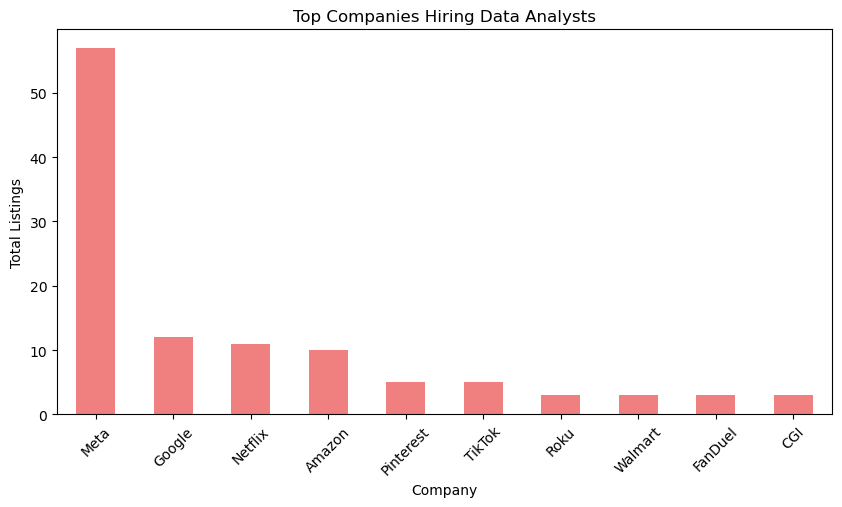

In [120]:
company_counts = df["company"].value_counts().head(10)

plt.figure(figsize=(10,5))
company_counts.plot(kind="bar", color="lightcoral")
plt.title("Top Companies Hiring Data Analysts")
plt.xlabel("Company")
plt.ylabel("Total Listings")
plt.xticks(rotation=45)
plt.show()

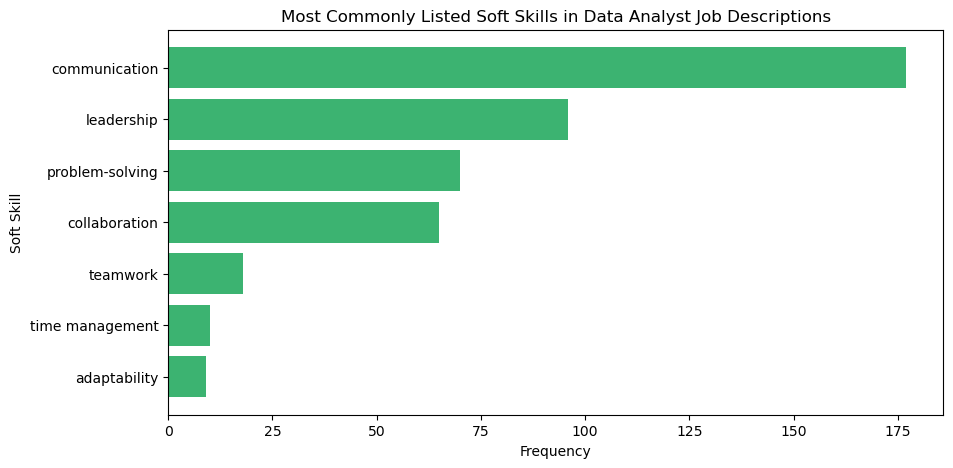

In [122]:
import re
from collections import Counter

# Define a list of common soft skills to search for
soft_skills = ["communication", "teamwork", "leadership", "adaptability", "problem-solving", "time management", "collaboration"]

# Function to extract soft skills
def extract_skills(description):
    skills_found = [skill for skill in soft_skills if re.search(rf"\b{skill}\b", description, re.IGNORECASE)]
    return skills_found

# Apply function to all descriptions
df["soft_skills"] = df["description"].apply(lambda x: extract_skills(str(x)))

# Flatten list and count occurrences
skills_flat = [skill for sublist in df["soft_skills"] for skill in sublist]
skill_counts = Counter(skills_flat)

# Convert to DataFrame for visualization
skill_df = pd.DataFrame(skill_counts.items(), columns=["Skill", "Count"]).sort_values(by="Count", ascending=False)

# Plot
plt.figure(figsize=(10,5))
plt.barh(skill_df["Skill"], skill_df["Count"], color="mediumseagreen")
plt.xlabel("Frequency")
plt.ylabel("Soft Skill")
plt.title("Most Commonly Listed Soft Skills in Data Analyst Job Descriptions")
plt.gca().invert_yaxis()  # Flip order for readability
plt.show()